# Lesson 1: Base ball vs Cricket

In this exercice, I will apply the tools and techniques learned from lesson 1 from the excellent course [deep learning for coders](https://course.fast.ai/).

The objectifs of the lesson are:

1. Create a small dataset with images to classify **Base Ball** images and **Cricket** games.
2. Use and adapt the `DataBunch` object to automatically load the data.
3. Look at the data to check the images and the set of class
4. Fine tune the `ResNet` network to classify those images.
5. Unfeeze the whole network and try to find the best *learning rate* to obtain a high score.
6. Result Interpretation.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#import evertything from the fastai library
from fastai import *
from fastai.vision import *

## Loading the data 

I used the `googleimagedownload` to download a set of images for Baseball and Cricket games. The data is stored in `data/baseCricket`. So, we will create a **Posix Path** poiting to this location and use the correct function from `ImageDataBunch` to load all the images

In [3]:
# path to the downloaded image
from pathlib import Path
path = Path("../data/baseCricket/")

#listing the path files
path.ls()

[PosixPath('../data/baseCricket/test'),
 PosixPath('../data/baseCricket/valid'),
 PosixPath('../data/baseCricket/train')]

Our *dataset* is ranged by **folder** 

>train/classname/images

>test/classname/images

In [14]:
batch_size = 100               #batch size
data = ImageDataBunch.from_folder(path,size=200,no_check=False,bs=batch_size)

## Looking at the data

Let's see how the data look like.

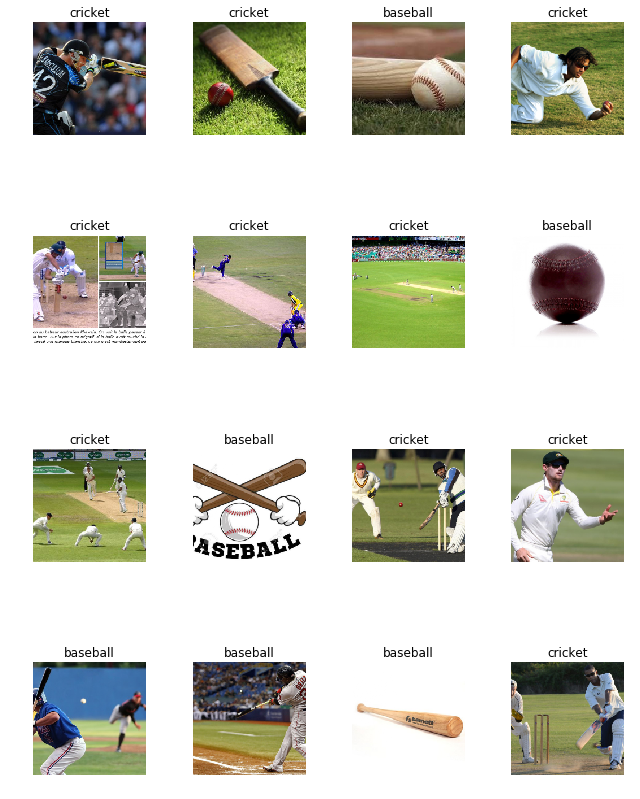

In [15]:
data.show_batch(rows=4,figsize=(9,12))

In [16]:
print("    ",data.classes)
print("    Number of class is {}".format(data.c))

     ['baseball', 'cricket']
    Number of class is 2


## Creating a learner from resnet

In [35]:
from fastai.metrics import error_rate
learner = cnn_learner(data,models.resnet34,metrics=[error_rate])

### One cycle fitting

In [36]:
learner.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.091975,1.407050,0.500000,00:03
1,0.988927,1.392180,0.500000,00:03
2,0.827896,1.093709,0.450000,00:03
3,0.708165,0.834898,0.366667,00:03
4,0.599720,0.684494,0.266667,00:03
5,0.526241,0.574413,0.233333,00:03


With only  **6 cycles** we could acheive an *error rate* of $\mathbf{23\%}$. But we could do better

In [37]:
learner.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.233452,0.503068,0.216667,00:03
1,0.188904,0.388517,0.200000,00:03
2,0.163263,0.287495,0.150000,00:03
3,0.136983,0.225294,0.100000,00:03
4,0.116798,0.184077,0.066667,00:03
5,0.109824,0.160546,0.066667,00:03


Now we achevied an error loss of $\mathbf{6\%}$. Pretty impressive

## Check the classification results

In [40]:
interp = ClassificationInterpretation.from_learner(learner)

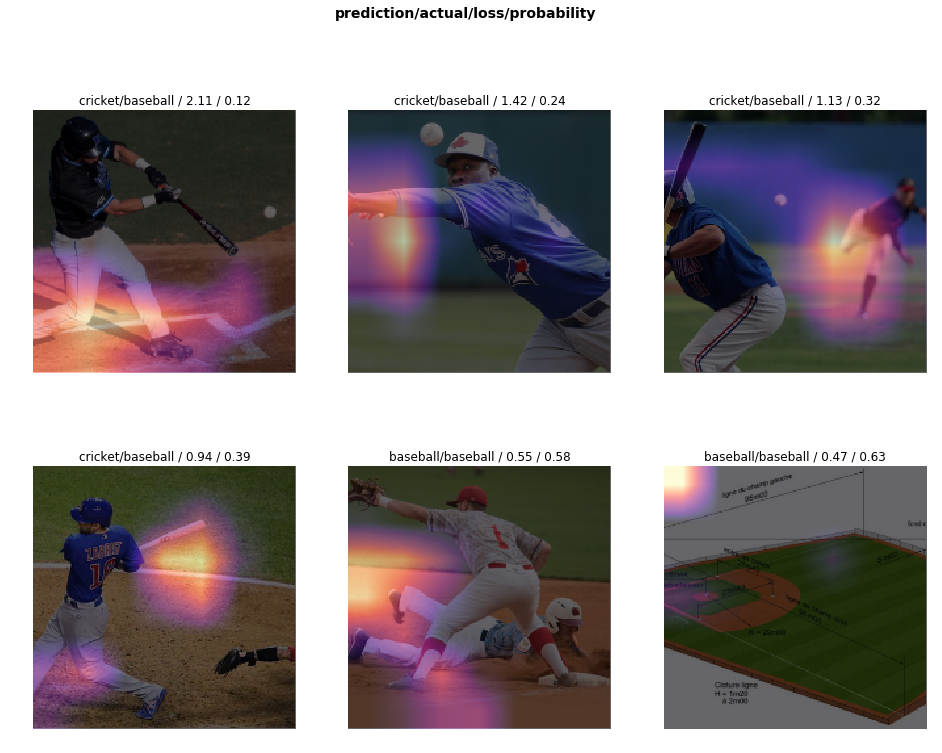

In [41]:
interp.plot_top_losses(6,figsize=(16,12))

In [42]:
#saving the model
learner.save('cricket_base.stage1')

## Learning all the weight

In [44]:
#Unfrease to learn all the weights
learner.unfreeze()

In [45]:
#plot the best learning rate
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


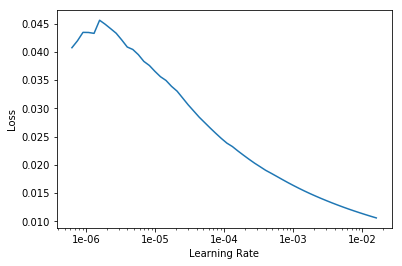

In [46]:
learner.recorder.plot()

We see that accuracy loss goes down with the learning rate. We could optimally choose the value $\gamma= 10^{-2}$

In [53]:
learner.fit_one_cycle(6,max_lr= slice(1e-4, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.312402,0.335186,0.116667,00:04
1,0.303315,0.327097,0.116667,00:04
2,0.302306,0.321003,0.116667,00:04
3,0.304091,0.312825,0.116667,00:04
4,0.308824,0.306861,0.116667,00:04
5,0.306702,0.303149,0.116667,00:04


Not as optimal with best pretrained value of restnet but close. One final trick let's see the the confusion matrix

In [54]:
report = ClassificationInterpretation.from_learner(learner)

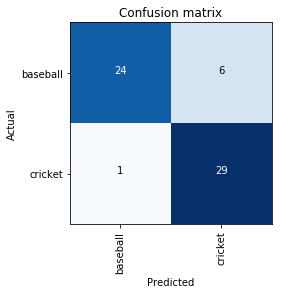

In [55]:
report.plot_confusion_matrix()